<a href="https://colab.research.google.com/github/Rama-Lekshmi/basic-nn-model/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Name : Rama E.K. Lekshmi
Register Number : 212222240082

In [ ]:
import pandas as pd



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd



In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('MARKSDATA').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'int'})
df = df.astype({'OUTPUT':'int'})
df.head()

,INPUT,OUTPUT
0,1,12
1,2,22
2,3,32
3,4,42
4,5,52


In [ ]:
X = df[['INPUT']].values
y = df[['OUTPUT']].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:

Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
marks_data = Sequential([Dense(6,activation='relu'),Dense(7,activation='relu'),Dense(1)])

In [ ]:
marks_data.compile(optimizer = 'rmsprop' , loss = 'mse')

In [ ]:
marks_data.fit(X_train1 , y_train,epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 528ms/step - loss: 7259.1982
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 7253.4087
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 7249.2158
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 7245.7061
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 7242.5830
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 7239.7085
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 7237.0039
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 7234.4248
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 7231.9502
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 7229.5562
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 7227.2280
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 7224.9634
Epoch 13/500
1

In [ ]:
loss_df = pd.DataFrame(marks_data.history.history)

<Axes: >

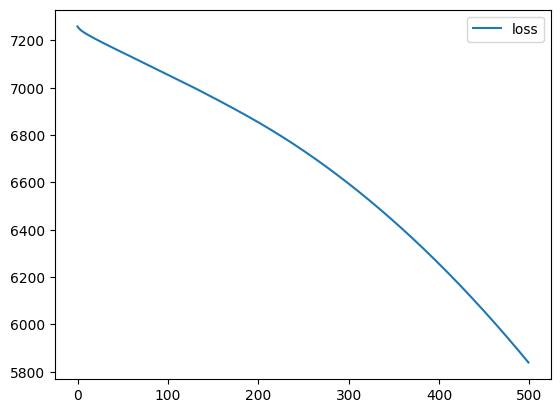

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
marks_data.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 9274.7344


9274.734375

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
marks_data.predict(X_n1_1)

1/1 [==============================] - 0s 85ms/step


array([[24.375347]], dtype=float32)